Lines detection

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines(input_path, threshold=100):
    img = cv2.imread(input_path)

    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)

    edge_map = cv2.Canny(blurred, 50, 150, apertureSize=3)
    detected_lines = cv2.HoughLines(edge_map, 1, np.pi / 180, threshold)

    lines_image = np.copy(img)

    if detected_lines is not None:
        for line in detected_lines:
            r, t = line[0]
            cos_t = np.cos(t)
            sin_t = np.sin(t)
            x0 = cos_t * r
            y0 = sin_t * r
            x1 = int(x0 + 1000 * (-sin_t))
            y1 = int(y0 + 1000 * (cos_t))
            x2 = int(x0 - 1000 * (-sin_t))
            y2 = int(y0 - 1000 * (cos_t))
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    final_image = cv2.cvtColor(lines_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')

    plt.subplot(1, 2, 2)
    plt.imshow(final_image)
    plt.title('Lines Detected')

    plt.show()


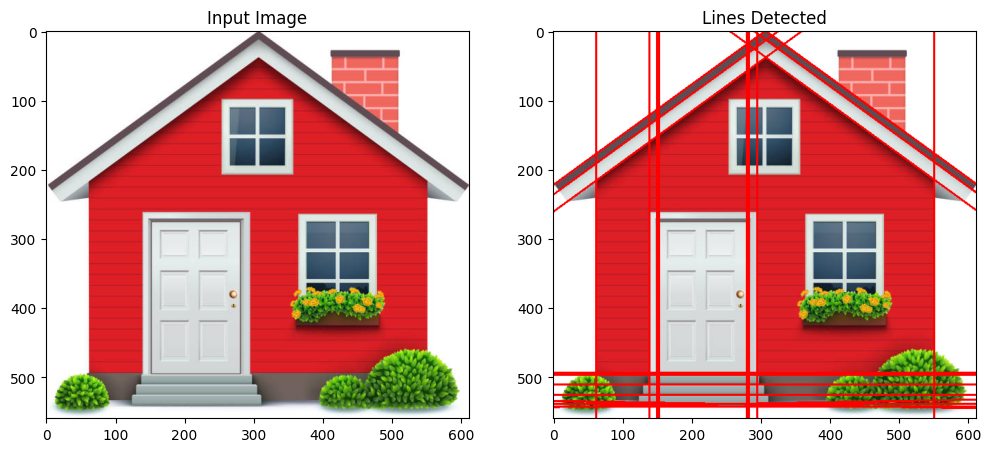

In [12]:
detect_lines('House Image.jpg', threshold=150)


Circles detection

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_circles(input_path, min_dist=20, param1=50, param2=30, min_radius=10, max_radius=100):
    img = cv2.imread(input_path)

    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)

    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT, dp=1, minDist=min_dist,
        param1=param1, param2=param2,
        minRadius=min_radius, maxRadius=max_radius
    )

    circles_image = np.copy(img)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(circles_image, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(circles_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    final_image = cv2.cvtColor(circles_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')

    plt.subplot(1, 2, 2)
    plt.imshow(final_image)
    plt.title('Circles Detected')

    plt.show()


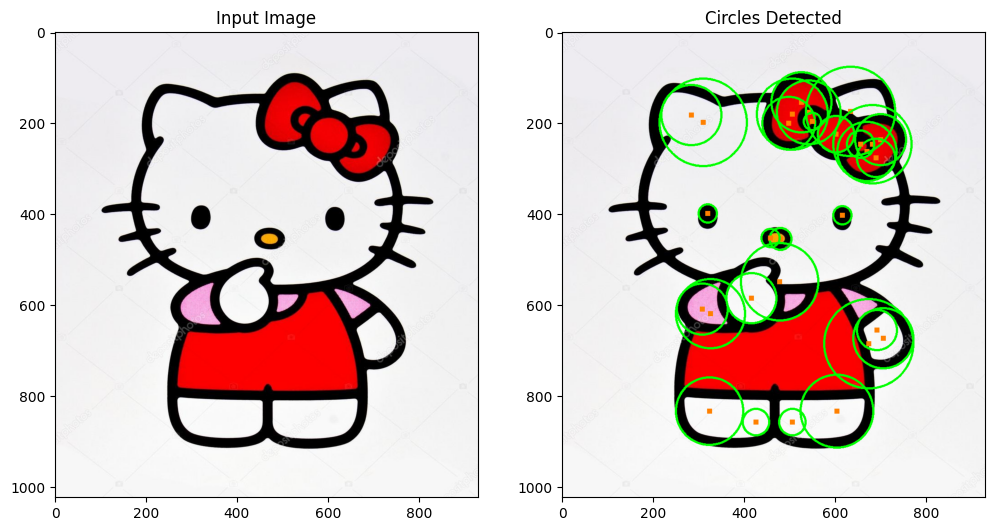

In [14]:
detect_circles('Hello Kitty.jpg', min_dist=20, param1=50, param2=30, min_radius=10, max_radius=100)


Both lines and circles detection

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_lines_and_circles(input_path, line_threshold=100, min_dist=20, param1=50, param2=30, min_radius=10, max_radius=100):
    img = cv2.imread(input_path)

    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)

    lines_image = np.copy(img)
    circles_image = np.copy(img)
    combined_image = np.copy(img)

    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT, dp=1, minDist=min_dist,
        param1=param1, param2=param2,
        minRadius=min_radius, maxRadius=max_radius
    )

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(circles_image, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(circles_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
            cv2.circle(combined_image, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(combined_image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    edge_map = cv2.Canny(blurred, 50, 150, apertureSize=3)
    detected_lines = cv2.HoughLines(edge_map, 1, np.pi / 180, line_threshold)

    if detected_lines is not None:
        for line in detected_lines:
            r, t = line[0]
            cos_t = np.cos(t)
            sin_t = np.sin(t)
            x0 = cos_t * r
            y0 = sin_t * r
            x1 = int(x0 + 1000 * (-sin_t))
            y1 = int(y0 + 1000 * (cos_t))
            x2 = int(x0 - 1000 * (-sin_t))
            y2 = int(y0 - 1000 * (cos_t))
            cv2.line(lines_image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.line(combined_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    lines_image_rgb = cv2.cvtColor(lines_image, cv2.COLOR_BGR2RGB)
    circles_image_rgb = cv2.cvtColor(circles_image, cv2.COLOR_BGR2RGB)
    combined_image_rgb = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(20, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')

    plt.subplot(2, 2, 2)
    plt.imshow(lines_image_rgb)
    plt.title('Lines Detected')

    plt.subplot(2, 2, 3)
    plt.imshow(circles_image_rgb)
    plt.title('Circles Detected')

    plt.subplot(2, 2, 4)
    plt.imshow(combined_image_rgb)
    plt.title('Lines and Circles Detected')

    plt.show()



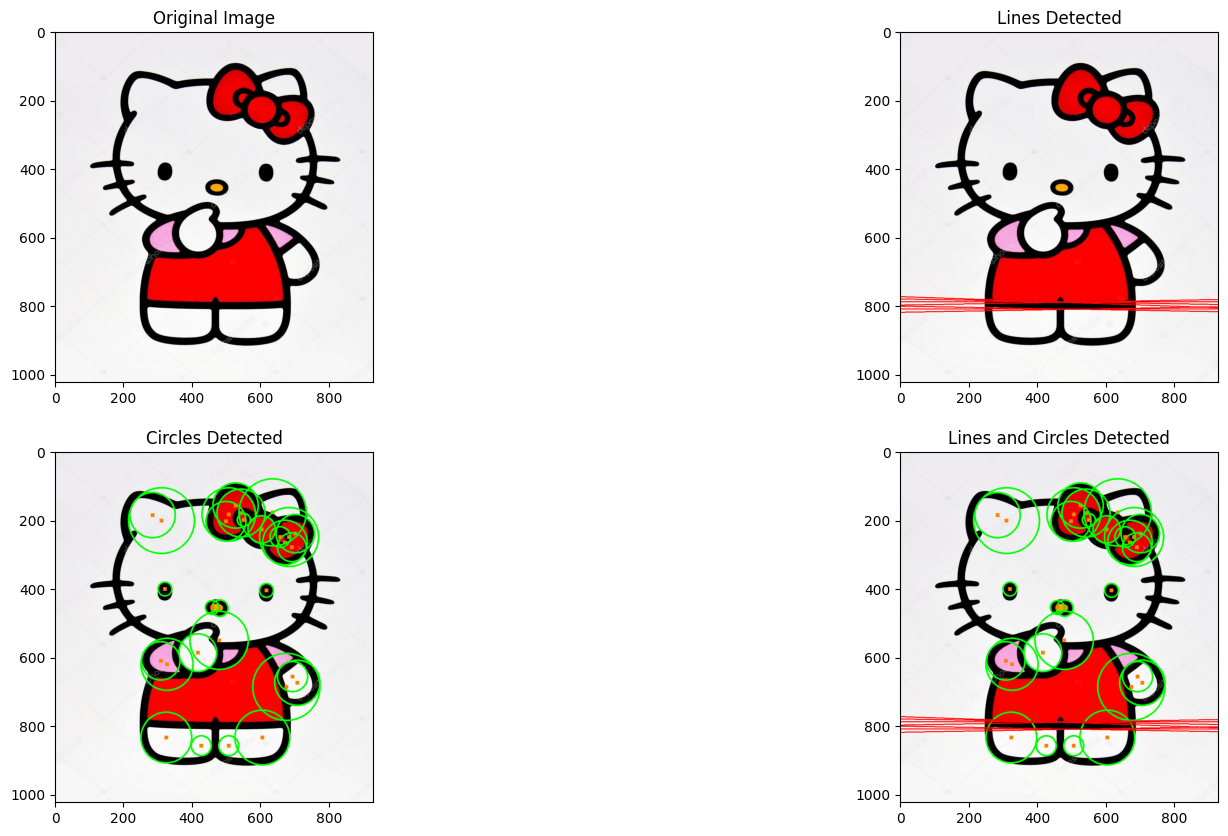

In [26]:
detect_lines_and_circles('Hello Kitty.jpg')
